#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("imdb_top_10000.txt",delimiter='\t', names=['imdbID','title','year','score','votes','runtime','genres'])
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[10000 rows x 7 columns]

In [171]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [172]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [173]:
df[df.genres.isna()]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [174]:
df = df.dropna()
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

## 2. Asking Questions

Which movies has received the highest score in which year?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [175]:
runtime =[int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime']= runtime
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [176]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [177]:
genre_set = set()
for genre in df.genres:
  genre_set.update(genre.split("|"))

In [178]:
len(genre_set)

24

In [179]:
for genre in genre_set:
    newdf[genre] = [genre in row.split("|") for row in newdf.genres]
    newdf.head()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [180]:
df['title'] = [t[0:-7] for t in newdf.title]
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


imdbID       title  year  score   votes  runtime  \
0  tt0111161  The Shawsh  1994    9.2  619479      142   
1  tt0110912              1994    9.0  490065      154   
2  tt0137523              1999    8.8  458173      139   
3  tt0133093              1999    8.7  448114      136   
4  tt1375666              2010    8.9  385149      148   

                             genres   News  Reality-TV  Comedy  ...  Music  \
0                       Crime|Drama  False       False   False  ...  False   
1                    Crime|Thriller  False       False   False  ...  False   
2            Drama|Mystery|Thriller  False       False   False  ...  False   
3           Action|Adventure|Sci-Fi  False       False   False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller  False       False   False  ...  False   

   Sci-Fi  Western  Crime  Adventure  Romance  Biography  Film-Noir  Mystery  \
0   False    False   True      False    False      False      False    False   
1   False    False   True      False    False      False      False    False   
2   False    False  False      False    False      False      False     True   
3    True    False  False       True    False      False      False    False   
4    True    False  False       True    False      False      False    False   

   Sport  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 31 columns]

## 4. EDA

In [181]:
ndf = newdf[['title','score','votes']]
ndf

title  score   votes
0     The Shawsh    9.2  619479
1                   9.0  490065
2                   8.8  458173
3                   8.7  448114
4                   8.9  385149
...          ...    ...     ...
9995                7.0    1357
9996                5.2    1357
9997    The Quil    6.5    1356
9998                6.5    1356
9999                6.9    1356

[9999 rows x 3 columns]

In [182]:
minscore=ndf['score'].min()
print("The minimum score is", minscore)
maxscore = ndf['score'].max()
print("The maximum score is", maxscore)

The minimum score is 1.5
The maximum score is 9.2


In [183]:
yeardf = newdf.groupby("year")
df1999 = yeardf.get_group(1999)

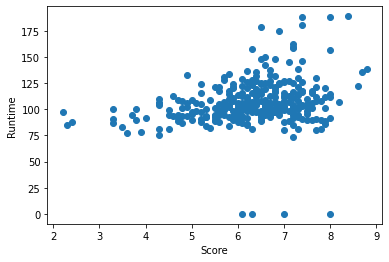

In [184]:
x = df1999.score
y = df1999.runtime

plt.scatter(x,y)
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.show()

In [185]:
year99 = yeardf[['score','runtime']].mean()[:10]

<function matplotlib.pyplot.show>

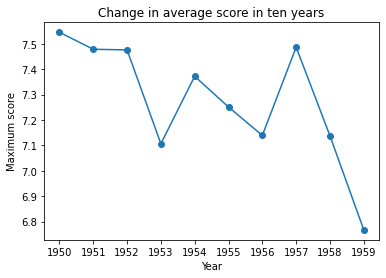

In [186]:
plt.plot(year99.index,year99.score,marker='o')
plt.xticks(year99.index)
plt.title('Change in average score in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum score")
plt.show

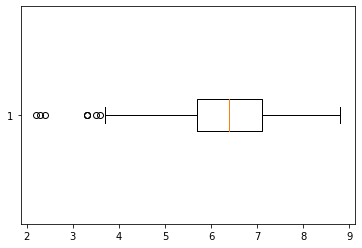

In [187]:
plt.boxplot(df1999.score,vert=False)
plt.show()

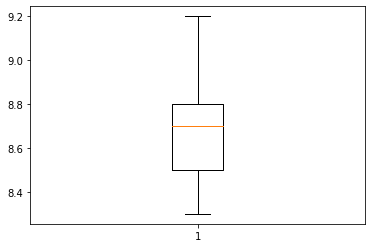

In [188]:
year20 = yeardf[['score','runtime']].max()[-20:]
plt.boxplot(year20.score)
plt.show()

## 5. Determining Best Movies

In [189]:
df_new= df.groupby("year")
df_new

In [190]:
len(df_new)

62

In [191]:
year_check = df.groupby("year", sort=False)
year_check

In [192]:
# finding for minimum score from the dataframe
for key, valuedf in year_check:
    highest_score = valuedf[valuedf['score'] == valuedf.score.max()]
    print(highest_score.title,highest_score.year,highest_score.score)
    break

0    The
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64


Conclusion : The Shawshank Redemption(1994) is a highest score that is 9.2 in the year of 1994

## 6. Trends in Popularity of Genres

In [193]:
genredf = newdf[list(genre_set)]
genredf.head()

News  Reality-TV  Comedy  Drama  Family  Fantasy  Animation    War  Adult  \
0  False       False   False   True   False    False      False  False  False   
1  False       False   False  False   False    False      False  False  False   
2  False       False   False   True   False    False      False  False  False   
3  False       False   False  False   False    False      False  False  False   
4  False       False   False  False   False    False      False  False  False   

   History  ...  Music  Sci-Fi  Western  Crime  Adventure  Romance  Biography  \
0    False  ...  False   False    False   True      False    False      False   
1    False  ...  False   False    False   True      False    False      False   
2    False  ...  False   False    False  False      False    False      False   
3    False  ...  False    True    False  False       True    False      False   
4    False  ...  False    True    False  False       True    False      False   

   Film-Noir  Mystery  Sport  
0      False    False  False  
1      False    False  False  
2      False     True  False  
3      False    False  False  
4      False    False  False  

[5 rows x 24 columns]

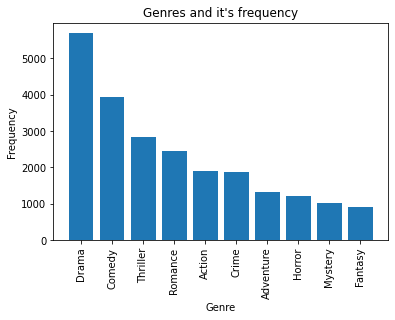

In [194]:
result = genredf.sum()
result = result.sort_values(ascending=False)[:10]
#x = sorted(genre_set)[:10]
x = result.index[:10]
y = result[:10]

#plot the data here
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

Drama is the most popular